# **Imports**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL
from keras import optimizers, losses
from keras.optimizers import *
import os
from keras import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# **Get & Preprocess Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/GP NTI/Train',
        target_size=(224, 224), batch_size=64,class_mode='categorical',shuffle=False)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/GP NTI/Test',
            target_size=(224, 224), batch_size=64,class_mode='categorical',shuffle=False)


Found 3890 images belonging to 95 classes.
Found 1039 images belonging to 95 classes.


In [8]:
train_path = "/content/drive/MyDrive/GP NTI/Train"
test_path = "/content/drive/MyDrive/GP NTI/Test"

In [9]:
train_set.class_indices

{'100': 0,
 'Angry': 1,
 'Bury': 2,
 'among': 3,
 'ankh': 4,
 'aroura': 5,
 'at': 6,
 'bad thinking': 7,
 'bandage': 8,
 'bee': 9,
 'belong': 10,
 'birth': 11,
 'board game': 12,
 'book': 13,
 'boy': 14,
 'branch': 15,
 'bread': 16,
 'brewer': 17,
 'builder': 18,
 'canal': 19,
 'cloth on pole': 20,
 'cobra': 21,
 'composite_bow': 22,
 'cooked': 23,
 'corpse': 24,
 'dessert': 25,
 'divide': 26,
 'duck': 27,
 'elephant': 28,
 'enclosed mound': 29,
 'eye': 30,
 'fabric': 31,
 'face': 32,
 'falcon': 33,
 'fingre': 34,
 'fish': 35,
 'flail': 36,
 'folded': 37,
 'foot': 38,
 'galena': 39,
 'giraffe': 40,
 'he': 41,
 'her': 42,
 'hit': 43,
 'horn': 44,
 'king': 45,
 'leg': 46,
 'length of a human arm': 47,
 'life spirit': 48,
 'limits': 49,
 'lion': 50,
 'lizard': 51,
 'loaf': 52,
 'loaf of bread': 53,
 'man': 54,
 'mascot': 55,
 'meet': 56,
 'mother': 57,
 'mouth': 58,
 'musical instrument': 59,
 'nile fish': 60,
 'not': 61,
 'now': 62,
 'nurse': 63,
 'nursing': 64,
 'occur': 65,
 'one': 66,

In [10]:
batch_size = 64
imageSize = 64

target_dims = (imageSize, imageSize, 3)
num_classes = 95

train_len = 3890
base_dir = os.path.join(os.getcwd(), "/content/drive/MyDrive/GP NTI/")
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/GP NTI/Train')
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(imageSize, imageSize),
    batch_size=batch_size)
              

Found 3890 files belonging to 95 classes.
Using 3501 files for training.


In [11]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.09,
    subset="validation",
    seed=123,
    image_size=(imageSize, imageSize),
    batch_size=batch_size)

Found 3890 files belonging to 95 classes.
Using 350 files for validation.


In [12]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.01,
    subset="validation",
    seed=123,
    image_size=(imageSize, imageSize),
    batch_size=batch_size)

Found 3890 files belonging to 95 classes.
Using 38 files for validation.


In [13]:
test_set.class_indices

{'100': 0,
 'Her': 1,
 'Woman': 2,
 'among': 3,
 'angry': 4,
 'ankh': 5,
 'aroura': 6,
 'at': 7,
 'bad thinking': 8,
 'bandage': 9,
 'bee': 10,
 'belongs': 11,
 'birth': 12,
 'board game': 13,
 'book': 14,
 'boy': 15,
 'branch': 16,
 'bread': 17,
 'brewer': 18,
 'builder': 19,
 'bury': 20,
 'canal': 21,
 'cloth on pole': 22,
 'cobra': 23,
 'composite_bow': 24,
 'cooked': 25,
 'corpse': 26,
 'dessert': 27,
 'divide': 28,
 'duck': 29,
 'elephant': 30,
 'enclosed mound': 31,
 'eye': 32,
 'fabric': 33,
 'face': 34,
 'falcon': 35,
 'fingre': 36,
 'fish': 37,
 'flail': 38,
 'folded': 39,
 'foot': 40,
 'galena': 41,
 'giraffe': 42,
 'he': 43,
 'hit': 44,
 'horn': 45,
 'king': 46,
 'leg': 47,
 'length of a human arm': 48,
 'life spirit': 49,
 'limits': 50,
 'lion': 51,
 'lizard': 52,
 'loaf': 53,
 'loaf of bread': 54,
 'man': 55,
 'mascot': 56,
 'meet': 57,
 'mother': 58,
 'mouth': 59,
 'musical instrument': 60,
 'nile fish': 61,
 'not': 62,
 'now': 63,
 'nurse': 64,
 'nursing': 65,
 'occur': 

# **Build Model**

In [14]:
resnet_model = Sequential()
pretrained_model= tf.keras.applications.resnet_v2.ResNet50V2(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=95,
                   weights='imagenet')


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(95, activation='softmax'))

94683136/94668760 [==============================] - 0s 0us/step


In [15]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 95)                48735     
                                                                 
Total params: 24,662,623
Trainable params: 24,617,183
Non-trainable params: 45,440
_________________________________________________________________


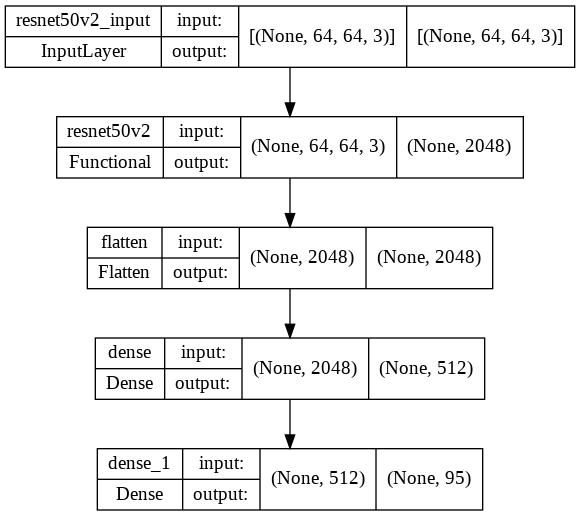

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model= resnet_model , show_shapes=True)

**Compile Model:**

In [17]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Train Model:**

In [18]:
history = resnet_model.fit(train_ds,
                           batch_size=64,
                           validation_batch_size=64,
                           validation_data=validation_ds,
                           epochs=60)

Epoch 1/60
55/55 [==============================] - 1765s 28s/step - loss: 3.3576 - accuracy: 0.1482 - val_loss: 3364.5249 - val_accuracy: 0.0086
Epoch 2/60
55/55 [==============================] - 9s 152ms/step - loss: 1.8475 - accuracy: 0.4053 - val_loss: 508.6802 - val_accuracy: 0.0086
Epoch 3/60
55/55 [==============================] - 10s 160ms/step - loss: 1.3108 - accuracy: 0.5550 - val_loss: 206.9879 - val_accuracy: 0.0086
Epoch 4/60
55/55 [==============================] - 9s 149ms/step - loss: 0.9656 - accuracy: 0.6638 - val_loss: 28.4464 - val_accuracy: 0.0400
Epoch 5/60
55/55 [==============================] - 9s 149ms/step - loss: 0.6258 - accuracy: 0.7769 - val_loss: 17.7613 - val_accuracy: 0.0257
Epoch 6/60
55/55 [==============================] - 9s 149ms/step - loss: 0.5685 - accuracy: 0.8061 - val_loss: 30.9943 - val_accuracy: 0.0057
Epoch 7/60
55/55 [==============================] - 9s 149ms/step - loss: 0.4668 - accuracy: 0.8420 - val_loss: 24.4585 - val_accuracy: 

# **Plotting**

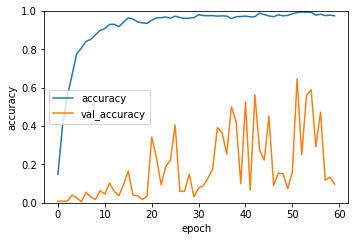

In [19]:
# Plotting Loss & Accuracy Graphs
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()

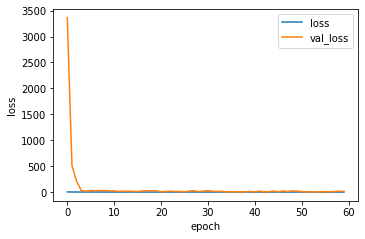

In [20]:
# Plotting Loss & Accuracy Graphs
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# **Evaluate Model**

In [21]:
resnet_model.evaluate(test_ds)

1/1 [==============================] - 1s 741ms/step - loss: 12.6240 - accuracy: 0.1316


[12.623987197875977, 0.1315789520740509]

In [22]:
resnet_model.evaluate(train_ds)

55/55 [==============================] - 7s 112ms/step - loss: 12.9506 - accuracy: 0.1297


[12.950645446777344, 0.12967723608016968]

# **Prediction**

In [23]:
y_pred=resnet_model.predict(test_ds)
y_pred.shape

(38, 95)

In [24]:
class_names = train_ds.class_names
actual = []
pred = []
for images, labels in test_ds:
    for i in range(0, len(images)):
        image = images[i]
        image = np.expand_dims(image, axis=0)
        result = resnet_model.predict(image)
        pred.append(class_names[np.argmax(result)])
        actual.append(class_names[labels[i].numpy()])

In [25]:
count=0
for i in range(len(actual)):
    if actual[i]==pred[i]:
        count+=1

print("Accuracy on test data is: ",(count/len(actual))*100)

Accuracy on test data is:  13.157894736842104


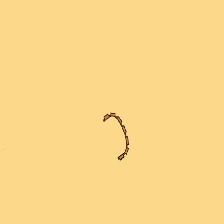

In [26]:
from keras.preprocessing import image
img1 =image.load_img('/content/drive/MyDrive/GP NTI/Test/wall/wall (48).jpg',target_size =(224,224))
img1